In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
os.chdir("drive/My Drive/Colab Notebooks/KIMCHAJANG")

In [5]:
ls

 data/                         SM_1206_1812.ipynb
 date_group2.csv              'submission(12.01).csv'
 date_group3.csv              'submission(12.02.-1).csv'
 jeju_bus_demend.ipynb        'submission(12.02.-2).csv'
 seculayer_submission_1.csv   'submission(12.03.-1).csv'
'SH_1128_01:10.ipynb의 사본'  'submission(12.04.-1).csv'
 sh_1203.ipynb                 weather2.csv
 SM_1205_1717.ipynb


#  **1. DATA SET LOAD** 

In [6]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
bus_bts = pd.read_csv("data/bus_bts.csv")


### **train, test columns describe** <br>
id : id 해당 데이터에서의 고유한 ID <br> 
data : 날짜 <br>
bus_route_id : 노선 ID <br>
in_out : 시내, 시외 구분 <br>
station_code : 승하자 정류소 ID <br>
station_name : 승하자 정류소 이름 <br>
lattitude : 위도 <br>
logitude : 경도 <br>
h_ride : 해당 시간 사이 승차한 인원수 <br>
h_takeoff : 해당 시간 사이 하차한 인원수 <br>
18~20_ride : 해당시간 사이 승차한 인원수 (target variable) <br>

In [7]:
print("train.csv. Shape: ",train.shape)
print("test.csv. Shape: ",test.shape)
print("bus_bts.csv. Shape: ",bus_bts.shape)

train.csv. Shape:  (415423, 21)
test.csv. Shape:  (228170, 20)
bus_bts.csv. Shape:  (2409414, 13)


In [8]:
train.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [10]:
bus_bts = bus_bts.sort_values('geton_date').reset_index().drop(['index'], axis=1)

In [11]:
#train, test 데이터로 나눠주기
bus_train = bus_bts.loc[:1548758]
bus_test = bus_bts.loc[1548759:]

In [12]:
bus_train.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,4.902208e+15,22530000,149793417,2019-09-01,11:30:37,136,산천단한국폴리텍대학,2019-09-01,11:41:31,3281.0,남국원(광양방면),1,1
1,1.010000e+15,24200000,149793810,2019-09-01,06:15:34,2980,용담어린이집,2019-09-01,06:38:46,1470.0,구산마을입구,1,1
2,1.019150e+15,22520000,149793432,2019-09-01,07:41:47,148,남서광마을입구,2019-09-01,07:48:35,3274.0,제주지방법원(아라방면),1,1
3,1.014140e+15,22520000,149793432,2019-09-01,07:45:20,3270,제주시청(아라방면),2019-09-01,08:01:42,119.0,죽성마을입구,6,1
4,1.014140e+15,22520000,149793432,2019-09-01,07:48:52,3274,제주지방법원(아라방면),2019-09-01,08:54:01,1957.0,중앙로터리,27,1


# **2.Explore/Preprocessing**

## **18~20_ride (종속변수) analysis**

In [13]:
train['18~20_ride'].describe()
#최대 최소 차이가 크다.
#Q1에서 Q3 까지 값이 비슷하다
#0에 값의 분포가 밀집 되어있을 수 있다.

count    415423.000000
mean          1.242095
std           4.722287
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         272.000000
Name: 18~20_ride, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


18~20_ride -> 왜도: 14.890267, 첨도: 424.854300


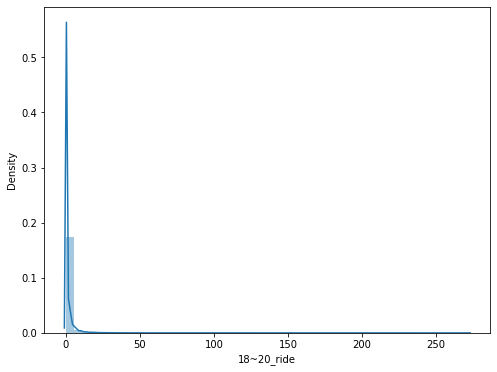

In [14]:
#종속 변수 분포확인, 왜도 첨도 확인
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['18~20_ride'])
print("%s -> 왜도: %f, 첨도: %f" % ('18~20_ride', train['18~20_ride'].skew(),train['18~20_ride'].kurt()))

왜도가 크다, 그래프를 보면 18~20_ride 값의 빈도가 0에 치우쳐져있음을 알 수 있다.

In [15]:
print("0 to '18~20_ride' has {}%".format(round(len(train[train['18~20_ride']==0])/len(train),2)*100))

0 to '18~20_ride' has 71.0%


71%의 데이터가 0을 가짐 -> 언더 또는 오버 샘플링 필요

## **data**

In [16]:
# data 타입변경
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [17]:
# 월요일 0 일요일 6

train['weekday'] = train['date'].dt.weekday
test['weekday'] = test['date'].dt.weekday

# 주말이면 0 평일이면 1

train['weekend'] = train['weekday'].map(lambda x : 1 if 4>x else 0)
test['weekend'] = test['weekday'].map(lambda x : 1 if 4>x else 0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


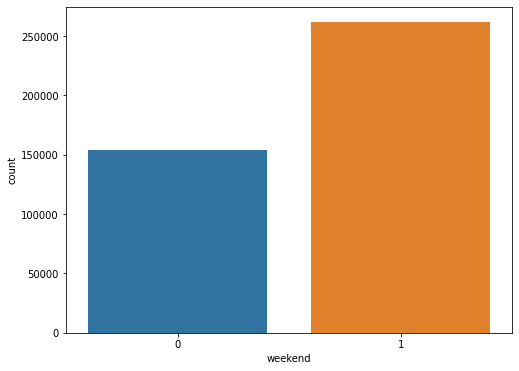

In [18]:
f, ax = plt.subplots(figsize = (8,6))
sns.countplot(train['weekend'])
plt.show()

## **in_out(시외,시내)**

In [19]:
train['in_out'] = train['in_out'].map({'시내':0,'시외':1})
test['in_out'] = test['in_out'].map({'시내':0,'시외':1})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


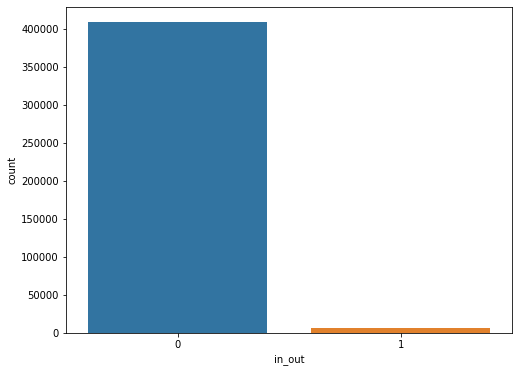

In [20]:
f, ax = plt.subplots(figsize = (8,6))
sns.countplot(train['in_out'])
plt.show()

## **bus_route_id, station_code, station_name**

In [21]:
print('bus_route_id unique : {}'.format(len(train['bus_route_id'].unique())))
print('station_code unique : {}'.format(len(train['station_code'].unique())))
print('station_name unique : {}'.format(len(train['station_name'].unique())))

bus_route_id unique : 613
station_code unique : 3563
station_name unique : 1961


### **bus_route_scoring**

In [22]:
#bus_route_id를 그룹화 하여 18~20_ride 종속변수를 평균낸다. 

train_bus = train[['18~20_ride','bus_route_id']].groupby('bus_route_id').mean().sort_values('18~20_ride').reset_index()
train_bus.tail()

,bus_route_id,18~20_ride
608,22530000,6.123388
609,23570000,12.321656
610,23580000,13.725938
611,23610000,14.995441
612,23620000,16.245000


In [23]:
#수치가 낮은것부터 1을 부여하며, 동점일 경우 같은 점수륿 부여하고 그다음 그룹부터는 +1을 하여 점수를 부여

bus_rank = train_bus['18~20_ride'].rank(method = 'dense', ascending = True)

In [24]:
bus_num = {}
for i, v in enumerate(bus_rank):
    bus = train_bus['bus_route_id'].iloc[i]
    bus_num[bus] = v

In [25]:
#{1:2, 2:3, 3:1} 이렇게 키와 값이 겹칠 경우 replace가 적용되지 않음
#따라서 map함수를 활용하여 값 변환할 것
#map함수 변환시 키가 없는 경우, NaN값으로 변환
#즉, 매칭되지 않은 test의 데이터같은경우 NaN값으로 변환

train['bus_route_score'] = train['bus_route_id'].map(bus_num)
test['bus_route_score'] = test['bus_route_id'].map(bus_num)

In [26]:
#test test데이터에 같은 key가 없으면 NaN값이 발생
#그 경우 train의 중앙값을 가지고와 입력

test['bus_route_score'].fillna(train['bus_route_score'].median(),inplace = True)

### **station_code_scoring**

In [27]:
train_st_code = train[['18~20_ride','station_code']].groupby('station_code').mean().sort_values('18~20_ride').reset_index()
train_st_code.tail()

,station_code,18~20_ride
3558,3290,17.827586
3559,201,22.217617
3560,3350,22.352273
3561,3351,35.000000
3562,1579,52.032258


In [28]:
code_rank = train_st_code['18~20_ride'].rank(method = 'dense', ascending = True)

In [29]:
st_code_num = {}
for i, v in enumerate(code_rank):
    st_code = train_st_code['station_code'].iloc[i]
    st_code_num[st_code] = v

In [30]:
#{1:2, 2:3, 3:1} 이렇게 키와 값이 겹칠 경우 replace가 적용되지 않음
#따라서 map함수를 활용하여 값 변환할 것
#map함수 변환시 키가 없는 경우, NaN값으로 변환
#즉, 매칭되지 않은 test의 데이터같은경우 NaN값으로 변환

train['station_code_score'] = train['station_code'].map(st_code_num)
test['station_code_score'] = test['station_code'].map(st_code_num)

In [31]:
test['station_code_score'].fillna(train['station_code_score'].median(), inplace = True)

## **bus_route_id & station_code**

In [32]:
rank_table = train.groupby(['station_code', 'bus_route_id'])[['18~20_ride']].mean().sort_values('18~20_ride').reset_index()
rank_table['station_rank'] = rank_table['18~20_ride'].rank(method = 'dense', ascending = True)

In [33]:
train = pd.merge(train, rank_table[['station_code', 'bus_route_id', 'station_rank']], on=['bus_route_id','station_code'], how='left')
test = pd.merge(test, rank_table[['station_code', 'bus_route_id', 'station_rank']], on=['bus_route_id','station_code'], how='left')

In [34]:
test['station_rank'].fillna(train['station_rank'].median(), inplace = True)

## **ride, takeoff**

In [35]:
#6~7과 7~8은 종속변수와 상관관계가 많이 낮아서 제거
train['8~12_ride'] = train['8~9_ride'] + train['9~10_ride'] + train['10~11_ride'] + train['11~12_ride']
test['8~12_ride'] = test['8~9_ride'] + test['9~10_ride'] + test['10~11_ride'] + test['11~12_ride']

In [36]:
train['total_takeoff'] = train['6~7_takeoff'] + train['7~8_takeoff'] + train['8~9_takeoff'] + train['9~10_takeoff'] + train['10~11_takeoff'] + train['11~12_takeoff']
test['total_takeoff'] = test['6~7_takeoff'] + test['7~8_takeoff'] + test['8~9_takeoff'] + test['9~10_takeoff'] + test['10~11_takeoff'] + test['11~12_takeoff']

In [37]:
#ride, take를 2시간마다 합침

train['6~8_ride']=train['6~7_ride']+train['7~8_ride']
train['8~10_ride']=train['8~9_ride']+train['9~10_ride']
train['10~12_ride']=train['10~11_ride']+train['11~12_ride']

test['6~8_ride']=test['6~7_ride']+test['7~8_ride']
test['8~10_ride']=test['8~9_ride']+test['9~10_ride']
test['10~12_ride']=test['10~11_ride']+test['11~12_ride']

train['6~8_takeoff']=train['6~7_takeoff']+train['7~8_takeoff']
train['8~10_takeoff']=train['8~9_takeoff']+train['9~10_takeoff']
train['10~12_takeoff']=train['10~11_takeoff']+train['11~12_takeoff']

test['6~8_takeoff']=test['6~7_takeoff']+test['7~8_takeoff']
test['8~10_takeoff']=test['8~9_takeoff']+test['9~10_takeoff']
test['10~12_takeoff']=test['10~11_takeoff']+test['11~12_takeoff']

**data별 8~12 ride 총합 추가 (유동인구가 많은 날이면 종속변수값이 클것이다)**

In [38]:
date_group=train['8~12_ride'].groupby(by=train['date']).sum()
date_dict=date_group.to_dict()
train['date_sum_pop']=train['date'].map(date_dict)

date_group=test['8~12_ride'].groupby(by=test['date']).sum()
date_dict=date_group.to_dict()
test['date_sum_pop']=test['date'].map(date_dict)

In [39]:

date_group=train['total_takeoff'].groupby(by=train['date']).sum()
date_dict=date_group.to_dict()
train['date_takeoff_sum_pop']=train['date'].map(date_dict)

date_group=test['total_takeoff'].groupby(by=test['date']).sum()
date_dict=date_group.to_dict()
test['date_takeoff_sum_pop']=test['date'].map(date_dict)

**station별 8~12 ride 총합 추가 (유동인구가 많은 날이면 종속변수값이 클것이다)**

In [40]:
code_group=train['8~12_ride'].groupby(by=train['station_code']).sum()
code_dict=code_group.to_dict()
train['code_sum_pop']=train['station_code'].map(code_dict)

code_group=test['8~12_ride'].groupby(by=test['station_code']).sum()
code_dict=code_group.to_dict()
test['code_sum_pop']=test['station_code'].map(code_dict)

In [41]:
code_group=train['total_takeoff'].groupby(by=train['station_code']).sum()
code_dict=code_group.to_dict()
train['code_takeoff_sum_pop']=train['station_code'].map(code_dict)

code_group=test['total_takeoff'].groupby(by=test['station_code']).sum()
code_dict=code_group.to_dict()
test['code_takeoff_sum_pop']=test['station_code'].map(code_dict)

**date별 시간 구간 ride 총합 추가 (유동인구가 많은 날이면 종속변수값이 클것이다)**

In [42]:
date_group=train['6~8_ride'].groupby(by=train['date']).sum()
date_dict=date_group.to_dict()
train['6~8ride_sum_pop']=train['date'].map(date_dict)

date_group=test['6~8_ride'].groupby(by=test['date']).sum()
date_dict=date_group.to_dict()
test['6~8ride_sum_pop']=test['date'].map(date_dict)

date_group=train['8~10_ride'].groupby(by=train['date']).sum()
date_dict=date_group.to_dict()
train['8~10ride_sum_pop']=train['date'].map(date_dict)

date_group=test['8~10_ride'].groupby(by=test['date']).sum()
date_dict=date_group.to_dict()
test['8~10ride_sum_pop']=test['date'].map(date_dict)

date_group=train['10~12_ride'].groupby(by=train['date']).sum()
date_dict=date_group.to_dict()
train['10~12ride_sum_pop']=train['date'].map(date_dict)

date_group=test['10~12_ride'].groupby(by=test['date']).sum()
date_dict=date_group.to_dict()
test['10~12ride_sum_pop']=test['date'].map(date_dict)

**date별 시간 구간 take_off 총합 추가 (유동인구가 많은 날이면 종속변수값이 클것이다)**

In [43]:
date_group=train['6~8_takeoff'].groupby(by=train['date']).sum()
date_dict=date_group.to_dict()
train['6~8takeoff_sum_pop']=train['date'].map(date_dict)

date_group=test['6~8_takeoff'].groupby(by=test['date']).sum()
date_dict=date_group.to_dict()
test['6~8takeoff_sum_pop']=test['date'].map(date_dict)

date_group=train['8~10_takeoff'].groupby(by=train['date']).sum()
date_dict=date_group.to_dict()
train['8~10takeoff_sum_pop']=train['date'].map(date_dict)

date_group=test['8~10_takeoff'].groupby(by=test['date']).sum()
date_dict=date_group.to_dict()
test['8~10takeoff_sum_pop']=test['date'].map(date_dict)

date_group=train['10~12_takeoff'].groupby(by=train['date']).sum()
date_dict=date_group.to_dict()
train['10~12takeoff_sum_pop']=train['date'].map(date_dict)

date_group=test['10~12_takeoff'].groupby(by=test['date']).sum()
date_dict=date_group.to_dict()
test['10~12takeoff_sum_pop']=test['date'].map(date_dict)

## **latitude, longitude**

In [44]:
# 지구가 구형이라는 것을 감안한 haversine 거리 계산 공식
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [45]:
jeju=(33.51411, 126.52969) # 제주 측정소 근처
gosan=(33.29382, 126.16283) #고산 측정소 근처
seongsan=(33.38677, 126.8802) #성산 측정소 근처
po=(33.24616, 126.5653) #서귀포 측정소 근처

In [46]:
from collections import Counter # count 용도

#train
t1 = ft_haversine_distance(train['latitude'].values,
                                                 train['longitude'].values, 
                                                 jeju[0],
                                                 jeju[1])
t2 = ft_haversine_distance(train['latitude'].values,
                                                 train['longitude'].values, 
                                                 gosan[0],
                                                 gosan[1])
t3 = ft_haversine_distance(train['latitude'].values,
                                                 train['longitude'].values, 
                                                 seongsan[0],
                                                 seongsan[1])
t4 = ft_haversine_distance(train['latitude'].values,
                                                 train['longitude'].values, 
                                                 po[0],
                                                 po[1])
train['to_jeju_distance'] = t1
train['to_gosan_distance'] = t2
train['to_seongsan_distance'] = t3
train['to_po_distance'] = t4

total=pd.DataFrame( list(zip( t1, t2, t3, t4)),
                   columns=['jeju','gosan','seongsan','po'] )
train['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)

#test
te1 = ft_haversine_distance(test['latitude'].values,
                                                 test['longitude'].values, 
                                                 jeju[0],
                                                 jeju[1])
te2 = ft_haversine_distance(test['latitude'].values,
                                                 test['longitude'].values, 
                                                 gosan[0],
                                                 gosan[1])
te3 = ft_haversine_distance(test['latitude'].values,
                                                 test['longitude'].values, 
                                                 seongsan[0],
                                                 seongsan[1])
te4 = ft_haversine_distance(test['latitude'].values,
                                                 test['longitude'].values, 
                                                 po[0],
                                                 po[1])
test['to_jeju_distance'] = te1
test['to_gosan_distance'] = te2
test['to_seongsan_distance'] = te3
test['to_po_distance'] = te4

total=pd.DataFrame( list(zip( te1, te2, te3, te4)),
                   columns=['jeju','gosan','seongsan','po'] )
test['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)

data22=train[['station_name','latitude','longitude','dist_name']].drop_duplicates(keep='first')

Counter(data22['dist_name'])

Counter({0: 1479, 1: 659, 2: 597, 3: 828})

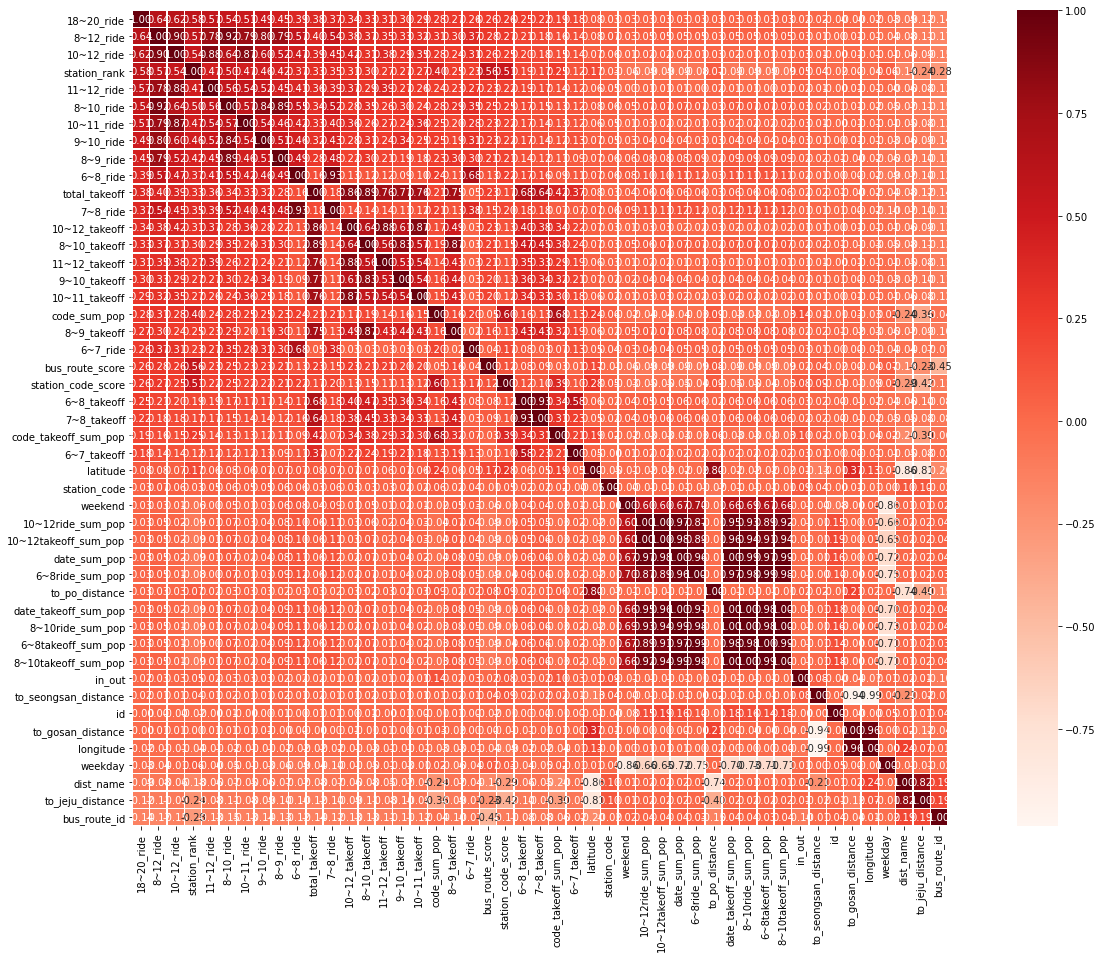

In [47]:
#상관관계 확인
k=train.shape[1] #히트맵 변수 갯수
corrmat = train.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, '18~20_ride')['18~20_ride'].index # 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

In [48]:
train = pd.get_dummies(train,columns=['dist_name'])
test = pd.get_dummies(test,columns=['dist_name'])

# **Modeling**

In [49]:
#model
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

#processing
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

#validate
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [50]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride', 'weekday', 'weekend', 'bus_route_score',
       'station_code_score', 'station_rank', '8~12_ride', 'total_takeoff',
       '6~8_ride', '8~10_ride', '10~12_ride', '6~8_takeoff', '8~10_takeoff',
       '10~12_takeoff', 'date_sum_pop', 'date_takeoff_sum_pop', 'code_sum_pop',
       'code_takeoff_sum_pop', '6~8ride_sum_pop', '8~10ride_sum_pop',
       '10~12ride_sum_pop', '6~8takeoff_sum_pop', '8~10takeoff_sum_pop',
       '10~12takeoff_sum_pop', 'to_jeju_distance', 'to_gosan_distance',
       'to_seongsan_distance', 'to_po_distance', 'dist_name_0', 'dist_name_1',
       'dist_name_2', 'dist_name_3'],
      dtype='object')

In [51]:
#validate를 한 후 성능을 떨어트리는 변수 제거
#종속변수와 상관관계가 높거나, 다중공산성이 덜한 변수로 구성
#논리적으로 성능을 향상시킬 것 같은 변수 포함

input_var=['in_out', 'weekend', 'to_jeju_distance', 'to_gosan_distance',
       'to_seongsan_distance', 'to_po_distance', '6~8_ride', '8~10_ride',
       '10~12_ride', '6~8_takeoff', '8~10_takeoff', '10~12_takeoff', 
       'code_sum_pop', 'station_rank', 'bus_route_score', 
       'station_code_score','dist_name_0', 'dist_name_1', 
       'dist_name_2', 'dist_name_3', 'code_takeoff_sum_pop',
       '6~8ride_sum_pop', '8~10ride_sum_pop', '10~12ride_sum_pop']
target=['18~20_ride']

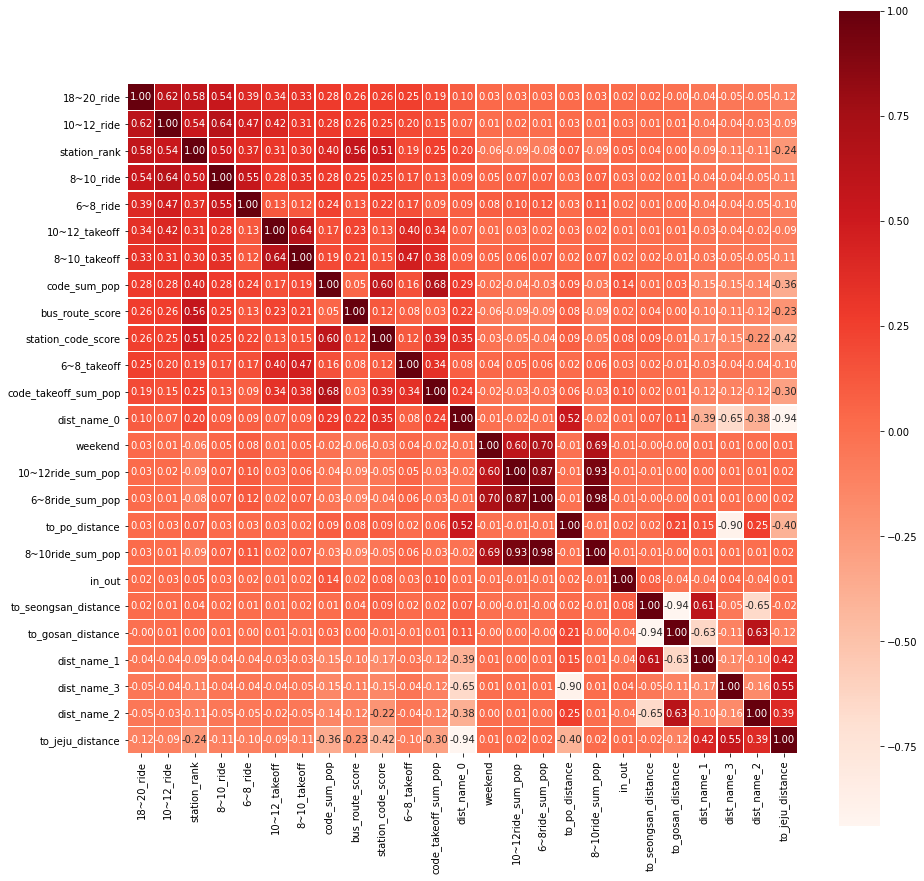

In [52]:
#상관관계 확인
corr_train = train[input_var + target]
k=corr_train.shape[1] #히트맵 변수 갯수
corrmat = corr_train.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, '18~20_ride')['18~20_ride'].index # 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(corr_train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

In [53]:
X_train=train[input_var]
y_train=train[target]

X_test=test[input_var]

In [61]:
model.fit(X_train,y_train,epochs=50,validation_split=0.2, batch_size=100,callbacks=[es])

Epoch 1/50
3324/3324 [==============================] - 57s 3ms/step - loss: 11481.0039 - mse: 11481.0039 - val_loss: 19.1631 - val_mse: 19.1631
Epoch 2/50
3324/3324 [==============================] - 10s 3ms/step - loss: 28.7442 - mse: 28.7442 - val_loss: 18.4097 - val_mse: 18.4097
Epoch 3/50
3324/3324 [==============================] - 9s 3ms/step - loss: 23.9191 - mse: 23.9191 - val_loss: 18.0130 - val_mse: 18.0130
Epoch 4/50
3324/3324 [==============================] - 9s 3ms/step - loss: 23.4363 - mse: 23.4363 - val_loss: 18.0233 - val_mse: 18.0233
Epoch 5/50
3324/3324 [==============================] - 9s 3ms/step - loss: 24.2472 - mse: 24.2472 - val_loss: 18.0189 - val_mse: 18.0189
Epoch 6/50
3324/3324 [==============================] - 10s 3ms/step - loss: 24.6878 - mse: 24.6878 - val_loss: 18.0266 - val_mse: 18.0266
Epoch 7/50
3324/3324 [==============================] - 10s 3ms/step - loss: 23.5273 - mse: 23.5273 - val_loss: 18.0278 - val_mse: 18.0278
Epoch 8/50
3324/3324 [==

**lightgbm과 xgboost는 별도로 학습**

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state=42))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42))
forest = RandomForestRegressor(n_jobs = -1, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=500, random_state=42)

# models = [{'model' : lasso, 'name' : 'LASSO Regression'}, 
#           {'model' : ENet, 'name' : 'Elastic Net Regression'}, 
#          {'model' : forest, 'name' : 'RandomForset'}]

In [ ]:
## cross-validation은 너무 오래 걸려서, 1차적으로 validation score확인하고 cross validation으로 넘어갈지 말지 판단 !!

def validate(models, X_train, y_train):
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state= 42)
  for m in models:
    modeling = m['model']
    modeling.fit(X_train, y_train)
    y_pred = modeling.predict(X_val)

    # 퇴근시간 인원이 0보다 작을 일은 없으므로 0보다 작으면 다 0으로 처리작업
    for i in range(len(y_pred)):
      if y_pred[i] < 0:
        y_pred[i] =0
    mse = np.sqrt(mean_squared_error(y_val, y_pred))
    # mse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))

    print("Model {} RMSE : {:.4f}".format( m['name'], mse))

  return

In [ ]:
%%time
validate(models, X_train, y_train)

In [ ]:
def get_oof_lgbm(params, train_data, test_data, target_data, num_round, early_round, verbose_round, random_state=42):

    # FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=random_state)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))

    features_lgb = list(train_data.columns)
    feature_importance_df = pd.DataFrame()

    X_train, X_val, y_train, y_val = train_test_split(train_data, target_data, test_size = 0.25, random_state= 42)
    
    trn_data = lgb.Dataset(X_train, y_train)
    val_data = lgb.Dataset( X_val, y_val)

    num_round = num_round
    clf = lgb.train(params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=verbose_round, 
                        early_stopping_rounds = early_round)
    y_pred = clf.predict(X_val, num_iteration=clf.best_iteration)

    for i in range(len(y_pred)):
      if y_pred[i] < 0:
        y_pred[i] =0
    mse = np.sqrt(mean_squared_error(y_val, y_pred))

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features_lgb
    fold_importance_df["importance"] = clf.feature_importance()
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    predictions = clf.predict(test_data, num_iteration=clf.best_iteration)
    return y_pred, predictions, feature_importance_df, mse

In [ ]:
lgb_params={"objective":"regression",
           "metric":"rmse",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04,
           "silent":True}
lgb_val_pred,lgb_pred,lgb_importance, lgb_mse =get_oof_lgbm(lgb_params, X_train, X_test, y_train, num_round=100000, early_round=400, verbose_round=500, random_state=42)

In [ ]:
def get_oof_xgb(params, train_data, test_data, target_data, num_round, early_round, verbose_round, N_SPLITS=5, random_state=0):

    FOLDs=KFold(n_splits=N_SPLITS, shuffle=True,random_state=random_state)

    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))

    feature_importance_df = pd.DataFrame()

    best_iters = []
    for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_data)):
        trn_data = xgb.DMatrix(train_data.iloc[trn_idx], label=target_data.iloc[trn_idx])
        val_data = xgb.DMatrix(train_data.iloc[val_idx], label=target_data.iloc[val_idx])

#         print("xgb " + str(fold_) + "-" * 50)

        watchlist = [(trn_data, 'train'), (val_data, 'valid')]
#         print("xgb " + str(fold_) + "-" * 50)
        num_round = num_round
        xgb_model = xgb.train(params, trn_data, num_round, watchlist, 
                              early_stopping_rounds=early_round, verbose_eval=verbose_round)
        oof[val_idx] = xgb_model.predict(xgb.DMatrix(train_data.iloc[val_idx]), 
                                             ntree_limit=xgb_model.best_ntree_limit)

        predictions += xgb_model.predict(xgb.DMatrix(test_data), 
                                             ntree_limit=xgb_model.best_ntree_limit) / FOLDs.n_splits
        
        fold_importance_df = pd.DataFrame([xgb_model.get_score()]).T.reset_index()
        fold_importance_df.columns = ['feature', 'importance']
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        best_iters.append(xgb_model.best_ntree_limit)
    return oof, predictions, feature_importance_df, np.mean(best_iters)

In [ ]:
xgb_params={"objective":"reg:linear",
           "metric":"rmse",
           "alpha":0.08,
           "gamma":0.06,
           "eta":0.04,
           "silent":True}
xgb_oof,xgb_pred,xgb_importance,xgb_best_mean=get_oof_xgb(xgb_params, X_train, X_test, y_train, num_round=100000, early_round=400, verbose_round=500, N_SPLITS=5, random_state=42)

In [ ]:
rf_X_train, X_val, rf_y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state= 42)
y_pred = forest.predict(X_val)

for i in range(len(y_pred)):
      if y_pred[i] < 0:
        y_pred[i] =0

y_pred

In [ ]:
xgb_train, xgb_val = train_test_split(xgb_pred, test_size = 0.25, random_state= 42)
for i in range(len(xgb_val)):
      if xgb_val[i] < 0:
        xgb_val[i] =0

In [ ]:
lgb_train, lgb_val = train_test_split(lgb_pred, test_size = 0.25, random_state= 42)
for i in range(len(lgb_val)):
      if lgb_val[i] < 0:
        lgb_val[i] =0

**rmse를 최소화 하는 모델을 선택하여 Averaging Model로 사용**



In [ ]:
t = (xgb_val + lgb_val, y_pred)/3

In [ ]:
t = (y_pred+lgb_val_pred)/2

In [ ]:
#xgb + rf + lgb
np.sqrt(mean_squared_error(y_val, t))

In [ ]:
#xgb + rf
np.sqrt(mean_squared_error(y_val, t))

In [ ]:
#lightgbm + rf
np.sqrt(mean_squared_error(y_val, t))

In [ ]:
forest.fit(X_train, y_train)
rf_prediction = forest.predict(X_test)
for i in range(len(rf_prediction)):
      if rf_prediction[i] < 0:
        rf_prediction[i] =0

In [ ]:
for i in range(len(lgb_pred)):
      if lgb_pred[i] < 0:
        lgb_pred[i] =0

In [ ]:
predictions = (lgb_pred + rf_prediction)/2

In [ ]:
sub = pd.read_csv('data/submission_sample.csv')

In [ ]:
sub['18~20_ride'] = predictions

In [ ]:
sub.to_csv('seculayer_submission_1.csv', index = False)